In [98]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
sales_df=pd.read_csv("Advertising.csv")
drop_list = ["Unnamed: 0"]

sales_df = sales_df.drop(drop_list, axis=1)
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [99]:
x=sales_df[['TV','Radio','Newspaper']]
y=sales_df['Sales']

In [100]:
#to standardize X nad Y features
y=np.array((y-y.mean())/y.std())
x=x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [103]:
print(x)

           TV     Radio  Newspaper
0    0.967425  0.979066   1.774493
1   -1.194379  1.080097   0.667903
2   -1.512360  1.524637   1.779084
3    0.051919  1.214806   1.283185
4    0.393196 -0.839507   1.278593
..        ...       ...        ...
195 -1.267759 -1.317724  -0.769287
196 -0.615491 -1.236899  -1.031011
197  0.348934 -0.940539  -1.109069
198  1.590574  1.261955   1.636743
199  0.990720 -0.987687  -1.003461

[200 rows x 3 columns]


In [104]:
#Implementing Gradient Descent Algorithm
#Random Initialization of the Bias & Weights
import random
def Initialize(dim):
  np.random.seed(seed=42)
  #initializae the bias
  b=random.random()
  #Initalize the weights
  w=np.random.rand(dim)

  return b, w

#dim is the number of weights to be initalized besides the bias.

In [105]:
b, w = Initialize(3)
print("Bias:",b , "weights:", w)

Bias: 0.5891314677035052 weights: [0.37454012 0.95071431 0.73199394]


In [130]:
def predict_y( b, w, x):
  return b + np.dot(x,w)


In [131]:
x.shape
w.shape

(3,)

In [132]:
print(x.shape)

(200, 3)


In [134]:
b, w = Initialize(3)
y_hat=predict_y(b,w_t,x)
y_hat[0:10]

array([ 3.04836599,  1.52471914,  2.64163118,  2.56996068,  0.741356  ,
        2.9882354 ,  0.43921441, -0.53248402, -2.49622458, -0.95115941])

In [138]:
#Calculating Mean Squared Error
#Calculating Difference between Estimated & Actual
import math
def get_cost(y,y_hat):
  y_resid=y-y_hat#Calculating the residuals i.e. difference between actual & predicted values.
  #then take the sum and divide by number of examples to calculate the mean

  return np.sum(np.matmul(y_resid,y_resid))/len(y_resid)


In [139]:
b, w = Initialize(3)
y_hat=predict_y(b,w_t,x)
get_cost(y,y_hat)

1.2497961641061708

In [147]:
#Updating the bias & Weights
def update_beta(x,y,y_hat,b_0,w_0,alpha):
  #gradient of bias
  db=(np.sum(y_hat-y)*2)/len(y)
  # gradient of weights
  dw=(np.dot((y_hat-y),x)*2)/len(y)

  #update bias & weights
  b_1=b_0-alpha*db
  w_1=w_0-alpha*dw
  return b_1,w_1


In [148]:
b, w = Initialize(3)
print("after initialization - Bias :",b,"weights:",w)
y_hat=predict_y(b,w_t,x)
b,w = update_beta(x,y,y_hat,b,w,0.01)
print("After update Bias :",b,"Weights :",w)

after initialization - Bias : 0.3537401053512337 weights: [0.37454012 0.95071431 0.73199394]
After update Bias : 0.346665303244209 Weights : [0.38079093 0.9376953  0.71484883]


In [163]:
# Finding the Optiimal Bias & Weights
# This can be done iteratively untill the cost is minimum & it can take several iterations and it is time consuming.
# by running a fixed number of iterations and use the bias and weights as optimal values at the end
# Run iterations untill the change in cost is small, that is , less than a predefined valye(0.001)

def run_gradient_descent(x,y,alpha=0.01,num_iterations=500):
  #initalize the bias & weights
  b,w =Initialize(x.shape[1])
  iter_num=0
  # gd_iterations keeps track of the cost every 10 iterations
  gd_iterations_df=pd.DataFrame(columns=['iterations','cost'])
  result_idx=0
  #Run the iteration in for loop
  for each_iter in range(num_iterations):
    # calculate the predicted value of Y
    y_hat=predict_y(b,w,x)
    #calculate the cost
    this_cost=get_cost(y,y_hat)
    #Save the Previous bias and weights
    prev_b=b
    prev_w=w
    #update and calculate the new values of bias and weights
    b,w = update_beta(x,y,y_hat,prev_b,prev_w,alpha)

    # for every 10 iterations store the cost i.e. MSE
    if (iter_num % 10 == 0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx+=1
    iter_num+=1
  print("Final estimate of b and w :", b,w)
  #return the final bias, weights and the cost at the end
  return gd_iterations_df,b,w



In [164]:
gd_iterations_df,b,w=run_gradient_descent(x,y,alpha=0.001,num_iterations=100)

Final estimate of b and w : 0.22217863819660313 [0.43270098 0.83742681 0.5799534 ]


In [165]:
gd_iterations_df[0:10]

,iterations,cost
0,0.0,1.195114
1,10.0,1.143161
2,20.0,1.093745
3,30.0,1.046740
4,40.0,1.002026
5,50.0,0.959488
6,60.0,0.919019
7,70.0,0.880515
8,80.0,0.843879
9,90.0,0.809019


In [166]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


Text(0, 0.5, 'cost of MSE')

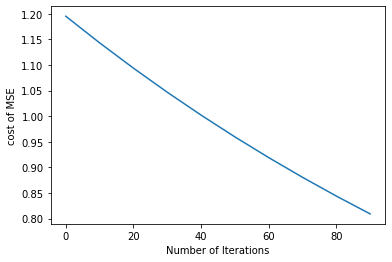

In [174]:
plt.plot(gd_iterations_df['iterations'],gd_iterations_df['cost']);
plt.xlabel("Number of Iterations")
plt.ylabel("cost of MSE")

In [168]:
print("final estimates of b and w :",b , w)

final estimates of b and w : 0.22217863819660313 [0.43270098 0.83742681 0.5799534 ]


In [169]:
alpha_df_1,b,w=run_gradient_descent(x,y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,w=run_gradient_descent(x,y,alpha=0.001,num_iterations=2000)

Final estimate of b and w : 2.777201673495839e-16 [ 0.75306591  0.53648155 -0.00433069]
Final estimate of b and w : 0.018058838933296753 [0.74315125 0.52779959 0.01171703]


Text(0.5, 1.0, 'cost vs Iterations for different alpha values')

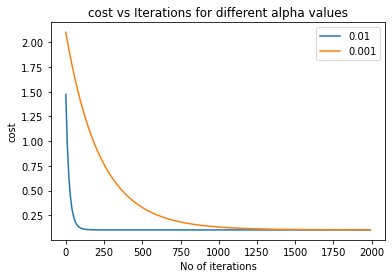

In [173]:
plt.plot(alpha_df_1['iterations'],alpha_df_1['cost'],label="0.01")
plt.plot(alpha_df_2['iterations'],alpha_df_2['cost'],label="0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel("No of iterations")
plt.title("cost vs Iterations for different alpha values")